In [1]:
# The usual preamble
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np





Let's continue with our NYC 311 service requests example.

In [3]:
complaints = pd.read_csv('../data/311-service-requests.csv')

/home/asit/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 3.1 Selecting only noise complaints

I'd like to know which borough has the most noise complaints. First, we'll take a look at the data to see what it looks like:

In [3]:
complaints.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


To get the noise complaints, we need to find the rows where the "Complaint Type" column is "Noise - Street/Sidewalk". I'll show you how to do that, and then explain what's going on.

In [6]:
type_of_complaint ="Illegal Parking"
noise_complaints = complaints[complaints['Complaint Type'] == type_of_complaint]
noise_complaints

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
12,26594169,10/31/2013 01:20:57 AM,10/31/2013 02:12:31 AM,NYPD,New York City Police Department,Illegal Parking,Double Parked Blocking Vehicle,Street/Sidewalk,10029,65 EAST 99 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.788974,-73.952259,"(40.78897400211689, -73.95225898702977)"
17,26595117,10/31/2013 12:52:46 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11236,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.632437,-73.888173,"(40.63243692394328, -73.88817263437012)"
116,26591037,10/30/2013 11:20:57 PM,10/31/2013 02:16:39 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11417,133-40 85 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.673471,-73.851131,"(40.67347065165803, -73.8511307325341)"
117,26592954,10/30/2013 11:20:26 PM,10/31/2013 01:18:56 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11365,197-05A 65 CRESCENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.739969,-73.776868,"(40.73996897148448, -73.7768682381755)"
123,26590061,10/30/2013 11:16:45 PM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10466,2153 NEREID AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.900441,-73.840675,"(40.90044076748922, -73.84067470473171)"
130,26595054,10/30/2013 11:11:51 PM,10/30/2013 11:59:02 PM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11214,8812 19TH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.601911,-74.005031,"(40.60191146016605, -74.00503081164801)"
140,26592551,10/30/2013 11:01:49 PM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11379,77-15 58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.726633,-73.883555,"(40.726633034808366, -73.8835552085296)"
169,26591386,10/30/2013 10:41:42 PM,10/30/2013 10:55:01 PM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11220,630 54 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.641044,-74.009650,"(40.64104365578832, -74.00964954514305)"
170,26592011,10/30/2013 10:41:35 PM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10469,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.877119,-73.838554,"(40.87711893780815, -73.83855371919336)"


If you look at `noise_complaints`, you'll see that this worked, and it only contains complaints with the right complaint type. But how does this work? Let's deconstruct it into two pieces

In [15]:
complaints['Complaint Type'] == "Noise - Street/Sidewalk"

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
...
111054     True
111055    False
111056    False
111057    False
111058    False
111059     True
111060    False
111061    False
111062    False
111063    False
111064    False
111065    False
111066     True
111067    False
111068    False
Name: Complaint Type, Length: 111069, dtype: bool

This is a big array of `True`s and `False`s, one for each row in our dataframe. When we index our dataframe with this array, we get just the rows where our boolean array evaluated to `True`.  It's important to note that for row filtering by a boolean array the length of our dataframe's index must be the same length as the boolean array used for filtering.

You can also combine more than one condition with the `&` operator like this:

In [7]:
is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk"
in_brooklyn = complaints['Borough'] == "BROOKLYN"
complaints[is_noise & in_brooklyn][:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
31,26595564,10/31/2013 12:30:36 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11236,AVENUE J,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634104,-73.911055,"(40.634103775951736, -73.91105541883589)"
49,26595553,10/31/2013 12:05:10 AM,10/31/2013 02:43:43 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11225,25 LEFFERTS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.661793,-73.959934,"(40.6617931276793, -73.95993363978067)"
109,26594653,10/30/2013 11:26:32 PM,10/31/2013 12:18:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11222,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.724600,-73.954271,"(40.724599563793525, -73.95427134534344)"
236,26591992,10/30/2013 10:02:58 PM,10/30/2013 10:23:20 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11218,DITMAS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636169,-73.972455,"(40.63616876563881, -73.97245504682485)"
370,26594167,10/30/2013 08:38:25 PM,10/30/2013 10:26:28 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11218,126 BEVERLY ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.642922,-73.978762,"(40.6429222774404, -73.97876175474585)"


Or if we just wanted a few columns:

In [17]:
complaints[is_noise & in_brooklyn][['Complaint Type', 'Borough', 'Created Date', 'Descriptor']][:10]

,Complaint Type,Borough,Created Date,Descriptor
31,Noise - Street/Sidewalk,BROOKLYN,10/31/2013 12:30:36 AM,Loud Music/Party
49,Noise - Street/Sidewalk,BROOKLYN,10/31/2013 12:05:10 AM,Loud Talking
109,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 11:26:32 PM,Loud Music/Party
236,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 10:02:58 PM,Loud Talking
370,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 08:38:25 PM,Loud Music/Party
378,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 08:32:13 PM,Loud Talking
656,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 06:07:39 PM,Loud Music/Party
1251,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 03:04:51 PM,Loud Talking
5416,Noise - Street/Sidewalk,BROOKLYN,10/29/2013 10:07:02 PM,Loud Talking
5584,Noise - Street/Sidewalk,BROOKLYN,10/29/2013 08:15:59 PM,Loud Music/Party


# 3.2 A digression about numpy arrays

On the inside, the type of a column is `pd.Series`

In [8]:
pd.Series([1,2,3])

0    1
1    2
2    3
dtype: int64

and pandas Series are internally numpy arrays. If you add `.values` to the end of any `Series`, you'll get its internal numpy array

In [9]:
np.array([1,2,3])

array([1, 2, 3])

In [10]:
pd.Series([1,2,3]).values

array([1, 2, 3])

So this binary-array-selection business is actually something that works with any numpy array:

In [11]:
arr = np.array([1,2,3])

In [12]:
arr != 2

array([ True, False,  True])

In [13]:
arr[arr != 2]

array([1, 3])

# 3.3 So, which borough has the most noise complaints?

In [15]:
is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk"


In [16]:
noise_complaints = complaints[is_noise]
noise_complaints['Borough'].value_counts()

MANHATTAN        917
BROOKLYN         456
BRONX            292
QUEENS           226
STATEN ISLAND     36
Unspecified        1
Name: Borough, dtype: int64

It's Manhattan! But what if we wanted to divide by the total number of complaints, to make it make a bit more sense? That would be easy too:

In [20]:
noise_complaint_counts = noise_complaints['Borough'].value_counts()
complaint_counts = complaints['Borough'].value_counts()

In [25]:
noise_complaint_counts / complaint_counts 

BRONX            148.328762
BROOKLYN         138.643965
MANHATTAN        377.552701
QUEENS           101.431713
STATEN ISLAND     74.735312
Unspecified        1.407063
Name: Borough, dtype: float64

Oops, why was that zero? That's no good. This is because of integer division in Python 2. Let's fix it, by converting `complaint_counts` into an array of floats.

In [26]:
# noise_complaint_counts / complaint_counts.astype(float)

/home/asit/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


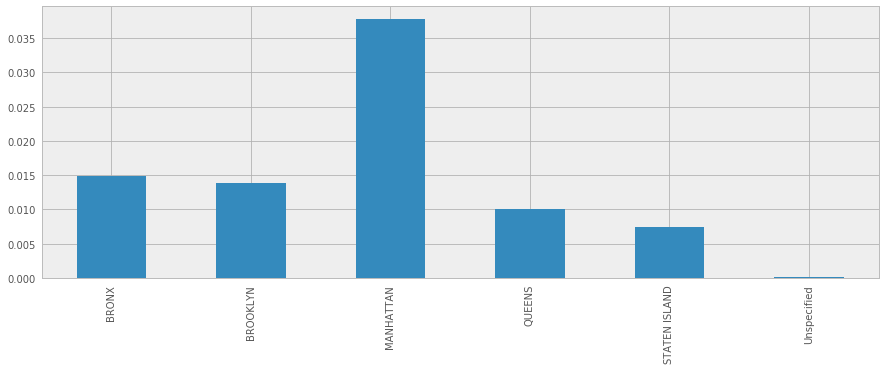

In [27]:
(noise_complaint_counts / complaint_counts.astype(float)).plot(kind='bar')

So Manhattan really does complain more about noise than the other boroughs! Neat.

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  